### Visualisations Code for the preprocessed datasets from 'Das Parfum':

#### 1. Venn Diagram of the 2 social classes plus the main character's description of human smell

Text(0.5, 1.0, "Venn Diagram Showing the Intersection of Smell Sources Descriptions between the Rich, Poor \n and Grenouille's Description of a General Human Smell")

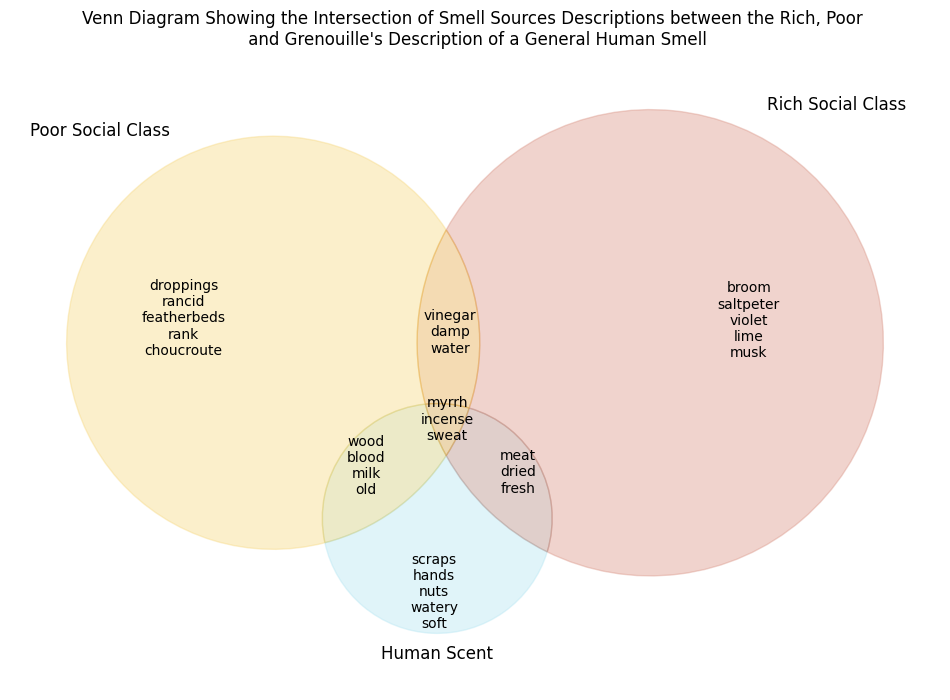

In [17]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import pandas as pd

#read CSV files 
df_human = pd.read_csv('human_freq.csv', delimiter=',', na_filter=False)
df_poor = pd.read_csv('poor_freq.csv', delimiter=',', na_filter=False)
df_rich = pd.read_csv('rich_freq.csv', delimiter=',', na_filter=False)

#use the column word from the three datasets
set_human = set(df_human['word'])
set_poor = set(df_poor['word'])
set_rich = set(df_rich['word'])

#format word to be added to the diagram and limit to 5
def get_formatted_words(set_words, max_words=5):
    if len(set_words) > max_words:
        return "\n".join(list(set_words)[:max_words]) #+ "\n+{}more".format(len(set_words) - max_words)
    else:
        return "\n".join(set_words)

#figure size, seperations and titles of each
plt.figure(figsize=(12, 10))
venn = venn3([set_poor, set_rich, set_human], ('Poor Social Class', 'Rich Social Class', 'Human Scent'))

#set different colours for each part and intersection
venn.get_patch_by_id('100').set_color('#f7d87f') #poor
venn.get_patch_by_id('010').set_color('#da9384') #rich
venn.get_patch_by_id('001').set_color('#b3e5f2') #human
venn.get_patch_by_id('110').set_color('#e4a541') #poor and rich
venn.get_patch_by_id('101').set_color('#d0cc77') # poor and human
venn.get_patch_by_id('011').set_color('#b3877d') #rich and human
venn.get_patch_by_id('111').set_color('#d09d3e') #poor and rich and human

#set the values inside each part and intersection
venn.get_label_by_id('100').set_text(get_formatted_words(set_poor - set_rich - set_human)) #poor
venn.get_label_by_id('010').set_text(get_formatted_words(set_rich - set_poor - set_human)) #rich
venn.get_label_by_id('001').set_text(get_formatted_words(set_human - set_poor - set_rich)) #human
venn.get_label_by_id('110').set_text(get_formatted_words(set_poor & set_rich - set_human)) #poor and rich
venn.get_label_by_id('101').set_text(get_formatted_words(set_poor & set_human - set_rich)) # poor and human
venn.get_label_by_id('011').set_text(get_formatted_words(set_rich & set_human - set_poor)) #rich and human
venn.get_label_by_id('111').set_text(get_formatted_words(set_poor & set_rich & set_human)) #poor and rich and human

#title
plt.title("Venn Diagram Showing the Intersection of Smell Sources Descriptions between the Rich, Poor \n and Grenouille's Description of a General Human Smell")


#### 2. Create merged data file for the frequncy graph

In [18]:
#read CSV file
human_freq_data = pd.read_csv('human_freq.csv', delimiter=',', na_filter=False)
poor_freq_data = pd.read_csv('poor_freq.csv', delimiter=',', na_filter=False)
rich_freq_data = pd.read_csv('rich_freq.csv', delimiter=',', na_filter=False)

#merge columns and empty NA rows
merged_data = human_freq_data.merge(poor_freq_data, on='word', how='outer').merge(rich_freq_data, on='word', how='outer')
merged_data = merged_data.fillna(0)
merged_data.columns = ['word', 'termfreq_human', 'docfreq_human', 'relfreq_human', 
                       'termfreq_poor', 'docfreq_poor', 'relfreq_poor', 
                       'termfreq_rich', 'docfreq_rich', 'relfreq_rich']

#sort values alphabetically on column word
merged_data_sorted = merged_data.sort_values(by='word')
#create column total term frequency based on the added values from the term frequencies of the three datasets
merged_data_sorted['total_termfreq'] = merged_data_sorted['termfreq_human'] + merged_data_sorted['termfreq_poor'] + merged_data_sorted['termfreq_rich']
#sort values on total term frequency
merged_data_freq = merged_data_sorted.sort_values(by='total_termfreq', ascending=False)

#save result to a CSV file
merged_data_freq.to_csv('merged_data_freq.csv', index=False)

#### 3. Create a Histogram of the highest term frequency words over the three datasets

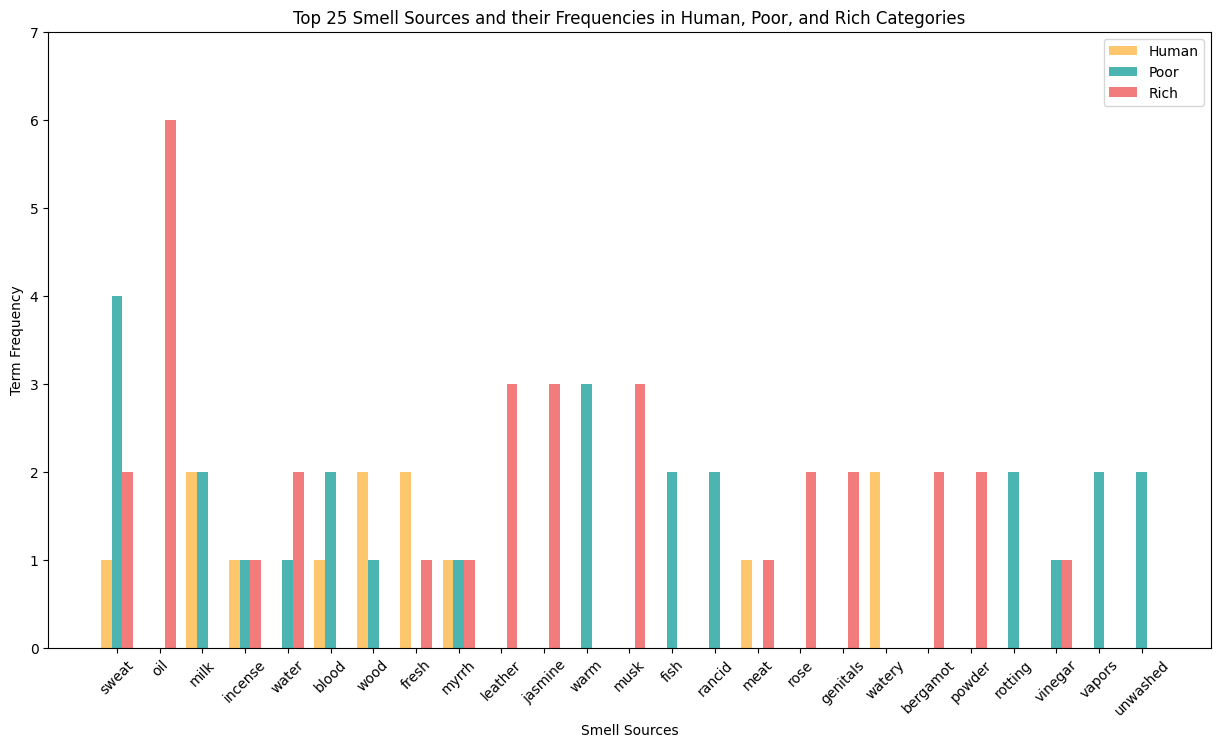

In [19]:
import numpy as np

#sort data by 'total_termfreq' and select top 25 words
most_freq_overall = merged_data_freq.sort_values(by='total_termfreq', ascending=False).head(25)

#extract frequencies for each part for the top 25 words
frequencies_human = most_freq_overall['termfreq_human']
frequencies_poor = most_freq_overall['termfreq_poor']
frequencies_rich = most_freq_overall['termfreq_rich']
words = most_freq_overall['word']

#bar plot
fig, ax = plt.subplots(figsize=(15, 8))

#bar positions and number
index = np.arange(25)
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, frequencies_human, bar_width, alpha=opacity, color='#ffba49', label='Human')
rects2 = ax.bar(index + bar_width, frequencies_poor, bar_width, alpha=opacity, color='#20a39e', label='Poor')
rects3 = ax.bar(index + 2 * bar_width, frequencies_rich, bar_width, alpha=opacity, color='#ef5b5b', label='Rich')

#set plot title and x, y labels, and legend
ax.set_yticks(range(0, 8, 1))
ax.set_xlabel('Smell Sources')
ax.set_ylabel('Term Frequency')
ax.set_title('Top 25 Smell Sources and their Frequencies in Human, Poor, and Rich Categories')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(words, rotation=45)
ax.legend()

#### 4. Creating a list of positive and negative smell qualities and adding a quality column to dataset

In [22]:
import pandas as pd

#load CSV file
merged_file = 'merged_data_freq.csv'
merged = pd.read_csv(merged_file)

#example lists of positive and negative words
positive_words = ['fresh', 'sweet', 'clean', 'jasmine', 'leather', 'myrrh', 'incense', 'freshly', 'herbs', 'soap', 'cinnamon', 'rose', 'bergamot', 'mint', 'neroli', 'nuts', 'orange', 'paradise', 'pears', 'petals', 'rosemary', 'roses', 'tuberose', 'velvet', 'violet', 'rosewood', 'sage', 'sandalwood', 'daffodils', 'blossom', 'bouquet', 'bouquets', 'iris', 'jonquil', 'lavender', 'floral', 'flowers']
negative_words = ['sweat', 'dirty', 'stale', 'sulfur', 'old', 'sour', 'cheese', 'rancid', 'meat', 'fish', 'rotting', 'unwashed', 'rank', 'moldering', 'onions', 'tumorous', 'urine', 'shoes', 'spoiled', 'stale', 'cheesy', 'meaty', 'armpits', 'cabbage', 'disease', 'droppings', 'rat', 'manure', 'hell', 'dust', 'eggs', 'feces', 'grease', 'greasy']

#determine if positive or negative else neutral
def determine_smell_source_quality(word):
    if word in positive_words:
        return 'positive'
    elif word in negative_words:
        return 'negative'
    else:
        return 'neutral'

#add 'word' column from data with values from function
merged['smell_source_quality'] = merged['word'].apply(determine_smell_source_quality)

merged.to_csv('merged_data_freq.csv', index=False)

#### 5. Lastly, dividing the words (smell sources) into classes and creating a contingency table of classes and quality

In [28]:
def determine_class(row):
    #term frequency of each class
    freq_human = row['termfreq_human']
    freq_poor = row['termfreq_poor']
    freq_rich = row['termfreq_rich']
    
    #if highest frequency in poor/human/rich then class = poor/human/rich
    max_freq = max(freq_human, freq_poor, freq_rich)
    classes = []
    if freq_human == max_freq:
        classes.append('human')
    if freq_poor == max_freq:
        classes.append('poor')
    if freq_rich == max_freq:
        classes.append('rich')
    
    #also handle ties by including multiple values for accuracy
    return ', '.join(classes)

#add column with values from function
merged['class'] = merged.apply(determine_class, axis=1)
merged.to_csv('merged_data_freq.csv', index=False)

In [29]:
#expanding data to seperate values in class column
expanded_data = merged.drop('class', axis=1).join(
    merged['class'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('class'))

#make a contingency table with frequency of words in each quality and class (the values will be used in r for statistical testing)
contingency_table_expanded = pd.crosstab(index=expanded_data['smell_source_quality'], columns=expanded_data['class'])

contingency_table_expanded

class,human,poor,rich
smell_source_quality,,,
negative,2,27,5
neutral,17,51,70
positive,5,4,30
